1.Load the Bank Full Data Set

In [1]:
import pandas as pd

filePath = '/content/bank-full.csv'
rawData = pd.read_csv(filePath, header=None)

2.Split the data

In [2]:
splitData = rawData[0].str.split(';', expand=True)

splitData.columns = splitData.iloc[0]  # Set the first row as headers
splitData = splitData[1:]  # Remove the first row because it's used as headers

# Remove double quotes
splitData = splitData.replace('"', '', regex=True)
splitData.columns = splitData.columns.str.replace('"', '', regex=True)
print("\nFirst 5 rows:")
print(splitData.head())



First 5 rows:
0 age           job  marital  education default balance housing loan  contact  \
1  58    management  married   tertiary      no    2143     yes   no  unknown   
2  44    technician   single  secondary      no      29     yes   no  unknown   
3  33  entrepreneur  married  secondary      no       2     yes  yes  unknown   
4  47   blue-collar  married    unknown      no    1506     yes   no  unknown   
5  33       unknown   single    unknown      no       1      no   no  unknown   

0 day month duration campaign pdays previous poutcome   y  
1   5   may      261        1    -1        0  unknown  no  
2   5   may      151        1    -1        0  unknown  no  
3   5   may       76        1    -1        0  unknown  no  
4   5   may       92        1    -1        0  unknown  no  
5   5   may      198        1    -1        0  unknown  no  


3. Check for missing values

In [3]:
missingValues = splitData.isnull().sum()
print("Missing values per column:\n", missingValues)

Missing values per column:
 0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


4.Checking for 'none" values

In [4]:
#Check for occurrences of "None" in each column
noneCounts = splitData.isin(['None']).sum()

# Display results
print("\nOccurrences of 'None' in each column:")
print(pd.DataFrame({'Count': noneCounts}))




Occurrences of 'None' in each column:
           Count
0               
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0


5.Capping outliers

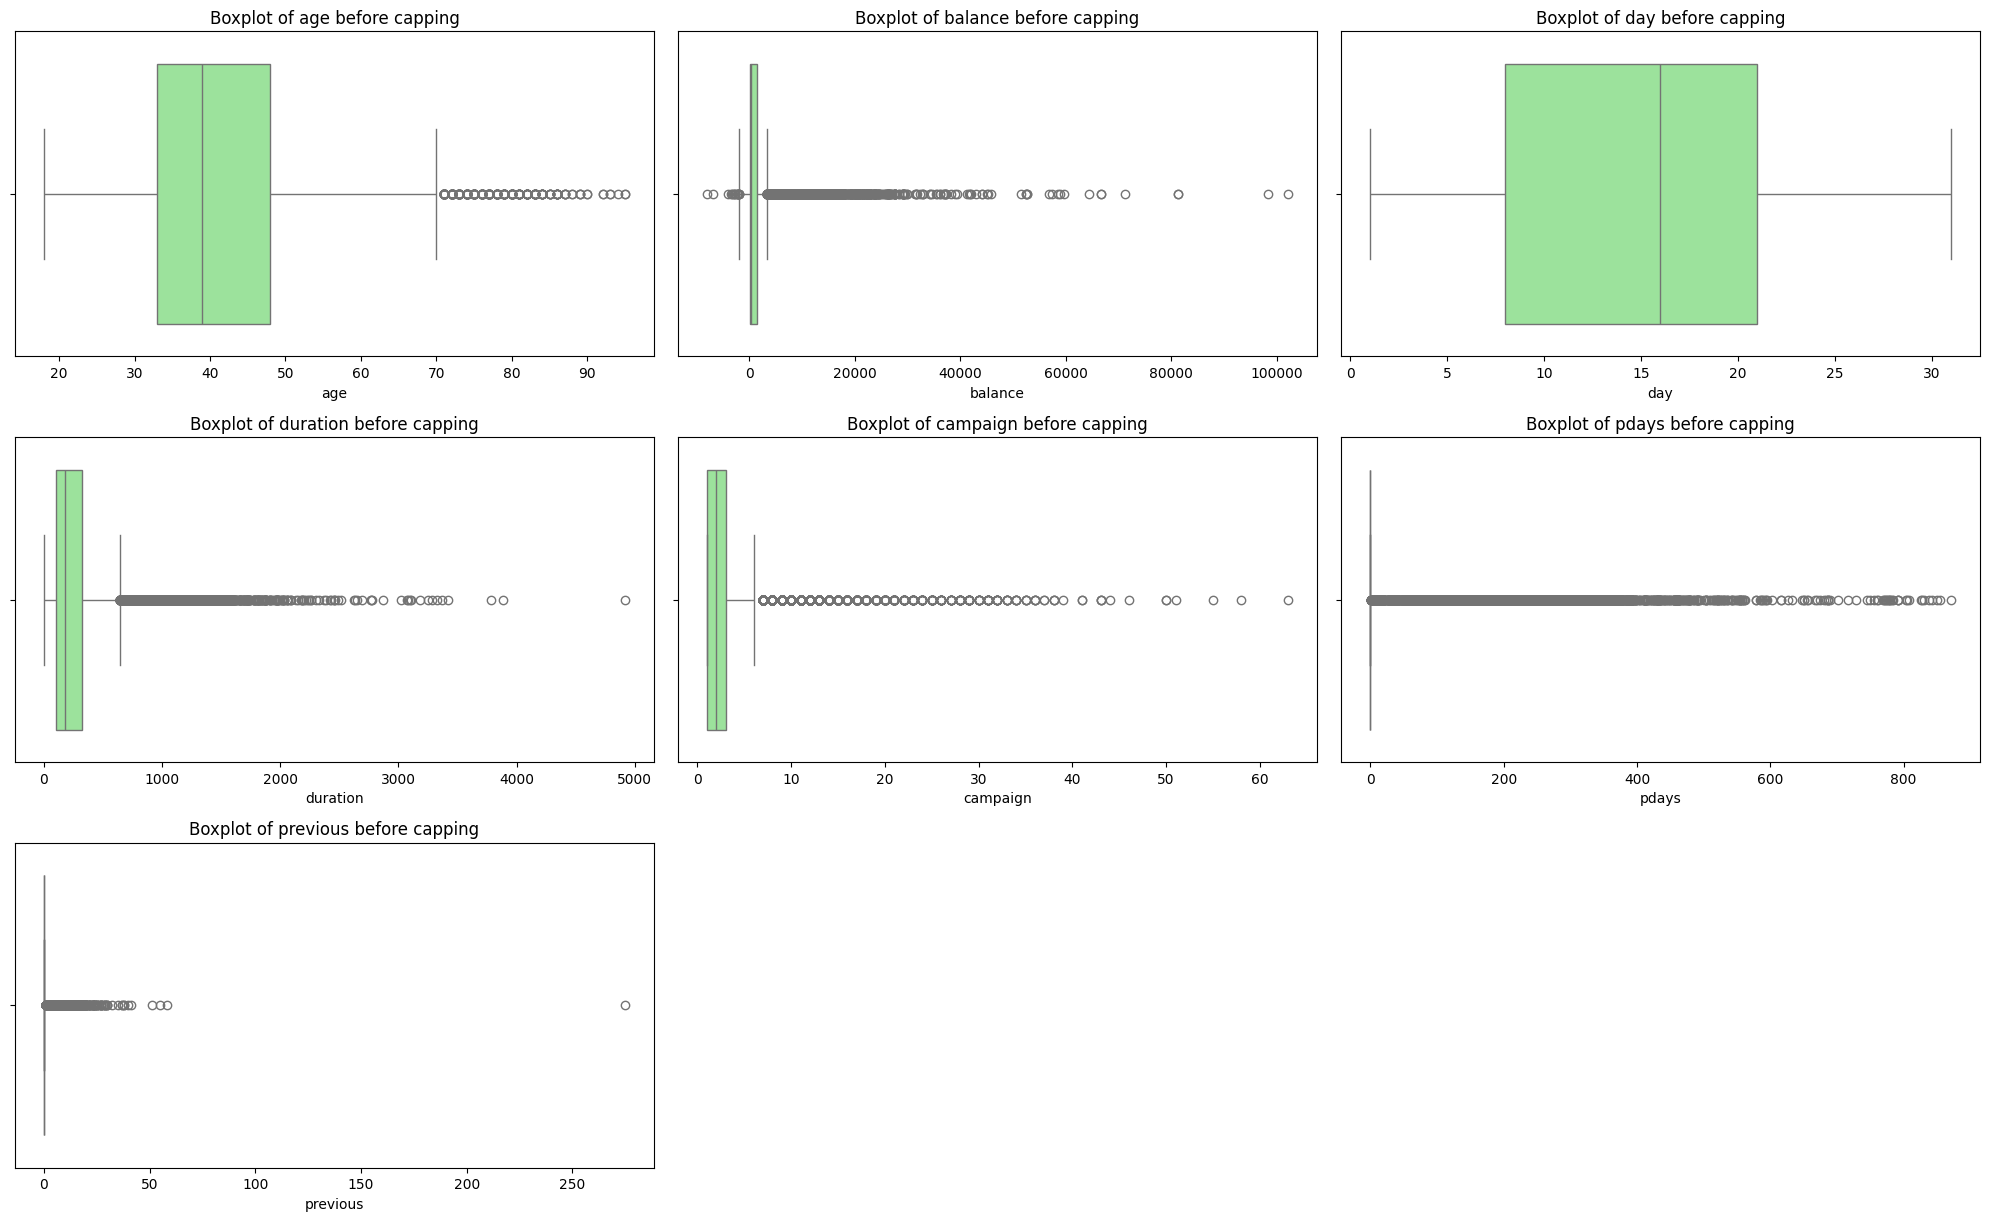

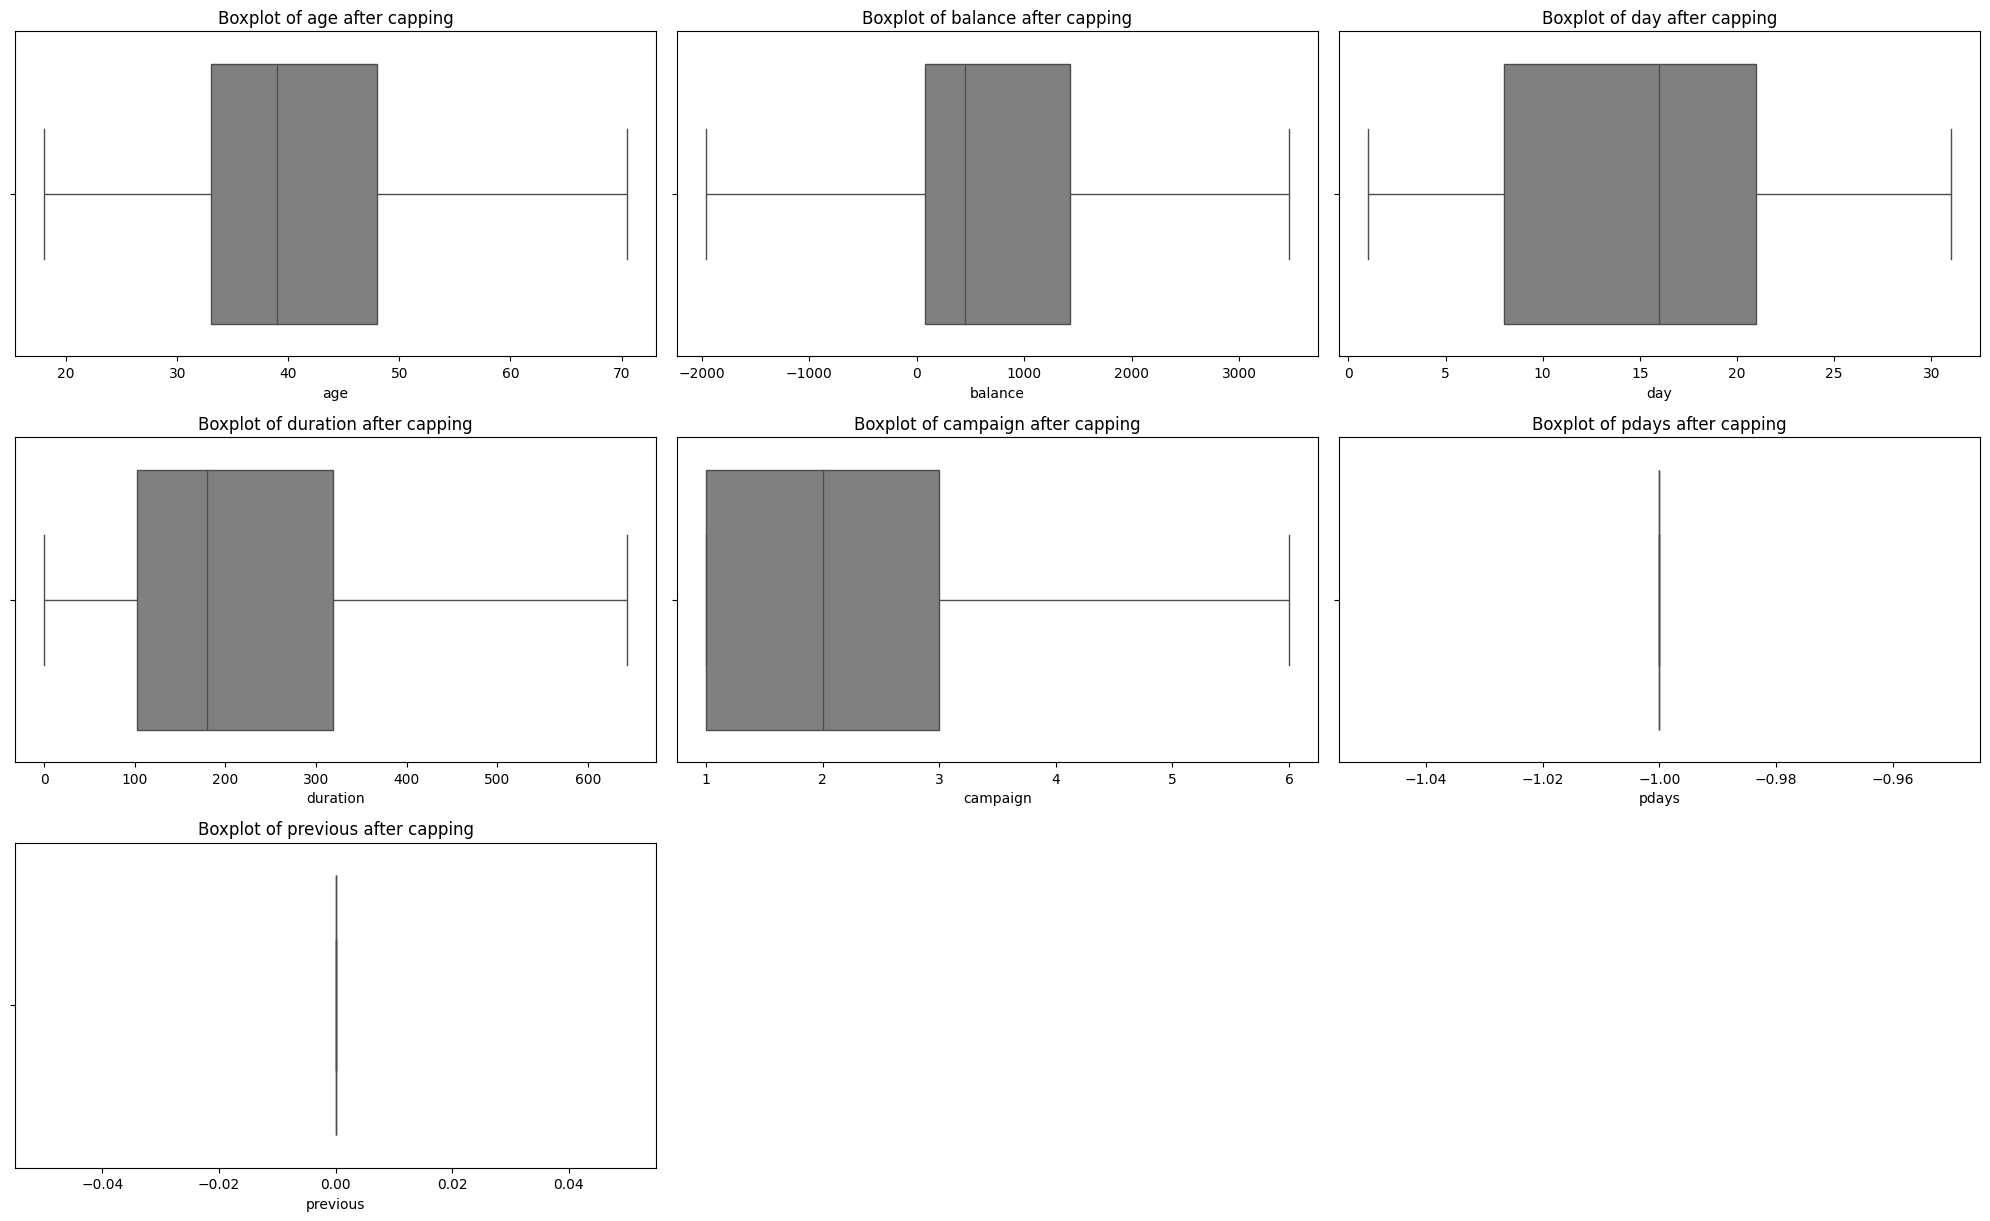

0   age           job  marital  education default  balance housing loan  \
1  58.0    management  married   tertiary      no     2143     yes   no   
2  44.0    technician   single  secondary      no       29     yes   no   
3  33.0  entrepreneur  married  secondary      no        2     yes  yes   
4  47.0   blue-collar  married    unknown      no     1506     yes   no   
5  33.0       unknown   single    unknown      no        1      no   no   

0  contact  day month  duration  campaign  pdays  previous poutcome   y  
1  unknown    5   may       261         1     -1         0  unknown  no  
2  unknown    5   may       151         1     -1         0  unknown  no  
3  unknown    5   may        76         1     -1         0  unknown  no  
4  unknown    5   may        92         1     -1         0  unknown  no  
5  unknown    5   may       198         1     -1         0  unknown  no  


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert numeric columns to appropriate data types
numericColumns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
splitData[numericColumns] = splitData[numericColumns].apply(pd.to_numeric)

# Create a figure with subplots
plt.figure(figsize=(20, 20))
plot_number = 1
for col in numericColumns:
    plt.subplot(5, 3, plot_number)
    sns.boxplot(x=splitData[col], color="lightgreen")
    plt.title(f"Boxplot of {col} before capping")
    plt.xlabel(col)
    plot_number += 1

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Detect and handle outliers using the IQR method with capping
def cap_outliers_iqr(df, numeric_columns):
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the values
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df
SplitData = cap_outliers_iqr(splitData, numericColumns)

# Create a figure with subplots
plt.figure(figsize=(20, 20))
plot_number = 1
for col in numericColumns:
    plt.subplot(5, 3, plot_number)
    sns.boxplot(x=splitData[col], color="gray")
    plt.title(f"Boxplot of {col} after capping")
    plt.xlabel(col)
    plot_number += 1

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


print(splitData.head())


6.Converting the numeric columns to integers

In [7]:
# Convert numerical variables to integers
splitData[numericColumns] = splitData[numericColumns].astype(int)

print("\nNumerical variables converted to integers:")
print(splitData.head())




Numerical variables converted to integers:
0  age           job  marital  education default  balance housing loan  \
1   58    management  married   tertiary      no     2143     yes   no   
2   44    technician   single  secondary      no       29     yes   no   
3   33  entrepreneur  married  secondary      no        2     yes  yes   
4   47   blue-collar  married    unknown      no     1506     yes   no   
5   33       unknown   single    unknown      no        1      no   no   

0  contact  day month  duration  campaign  pdays  previous poutcome   y  
1  unknown    5   may       261         1     -1         0  unknown  no  
2  unknown    5   may       151         1     -1         0  unknown  no  
3  unknown    5   may        76         1     -1         0  unknown  no  
4  unknown    5   may        92         1     -1         0  unknown  no  
5  unknown    5   may       198         1     -1         0  unknown  no  


7.Numerical column distribution

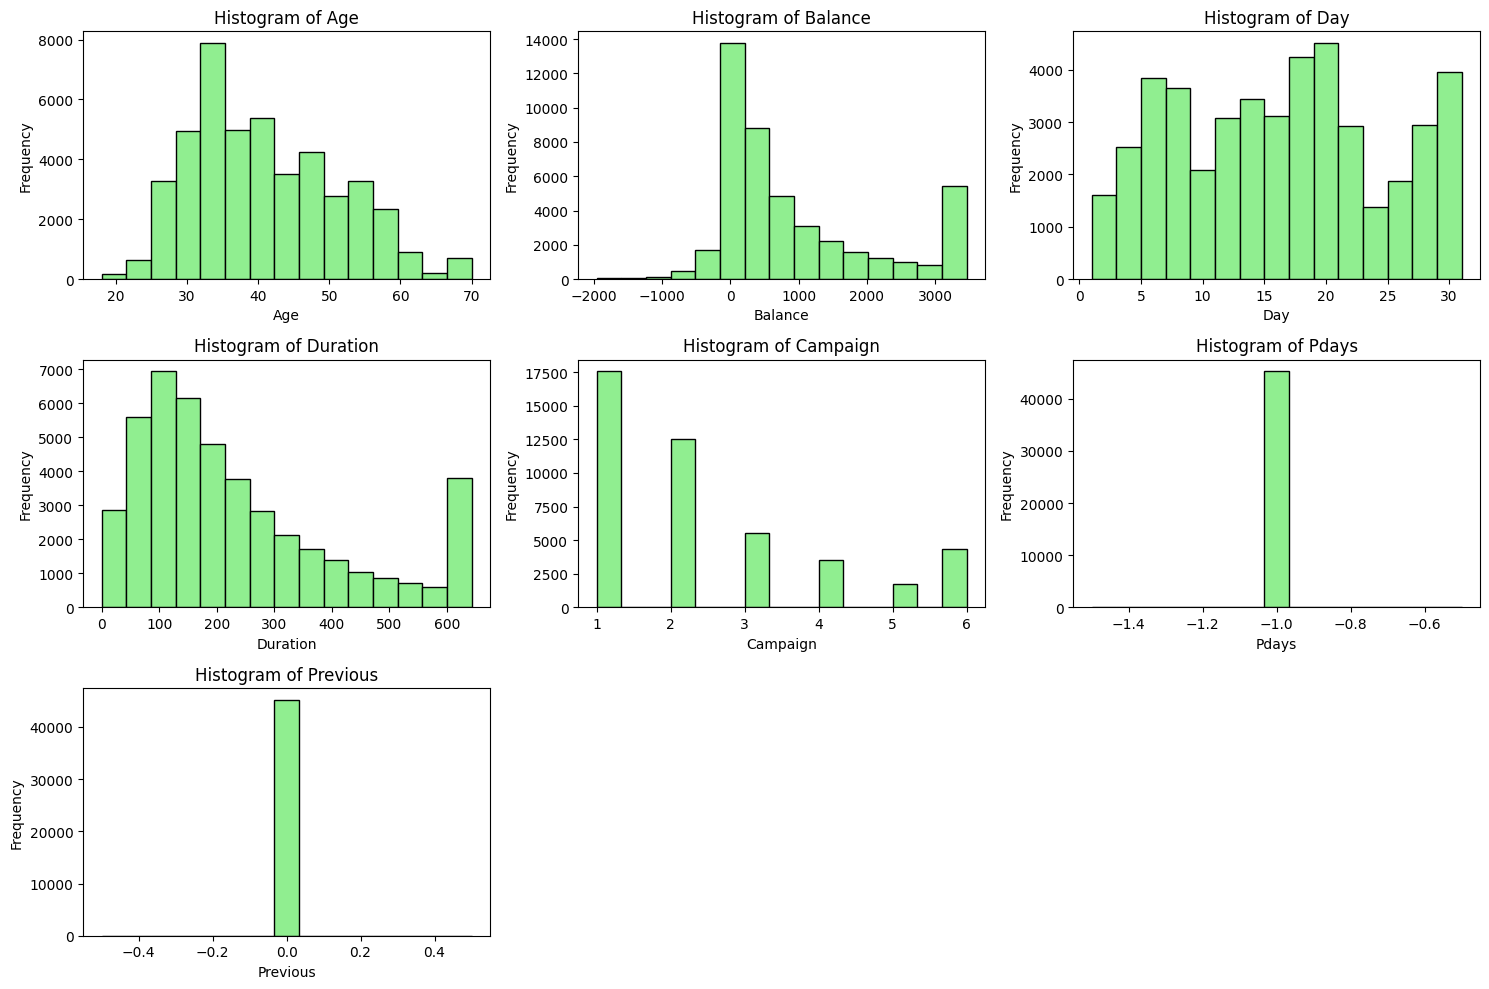

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Number of rows and columns for the grid
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Iterate over each numerical column and plot
for i, col in enumerate(numericColumns):
    axes[i].hist(splitData[col], bins=15, color='lightgreen', edgecolor='black')
    axes[i].set_title(f"Histogram of {col.capitalize()}")
    axes[i].set_xlabel(f"{col.capitalize()}")
    axes[i].set_ylabel("Frequency")

# Remove any empty subplots if the grid has more slots than needed
for j in range(len(numericColumns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


8.Encoding categorical variables

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
labelEncoders = {}

for col in categoricalColumns:
    le = LabelEncoder()
    splitData[col] = le.fit_transform(splitData[col])
    labelEncoders[col] = le

# Display the data after encoding
print("\nAfter encoding categorical variables:")
print(splitData.head())

# Print the mappings for each categorical variable
for col, le in labelEncoders.items():
    print(f"Mapping for column '{col}':")
    print(dict(zip(le.classes_, le.transform(le.classes_))))



After encoding categorical variables:
0  age  job  marital  education  default  balance  housing  loan  contact  \
1   58    4        1          2        0     2143        1     0        2   
2   44    9        2          1        0       29        1     0        2   
3   33    2        1          1        0        2        1     1        2   
4   47    1        1          3        0     1506        1     0        2   
5   33   11        2          3        0        1        0     0        2   

0  day  month  duration  campaign  pdays  previous  poutcome  y  
1    5      8       261         1     -1         0         3  0  
2    5      8       151         1     -1         0         3  0  
3    5      8        76         1     -1         0         3  0  
4    5      8        92         1     -1         0         3  0  
5    5      8       198         1     -1         0         3  0  
Mapping for column 'job':
{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'manageme

9.Categorical column distribution

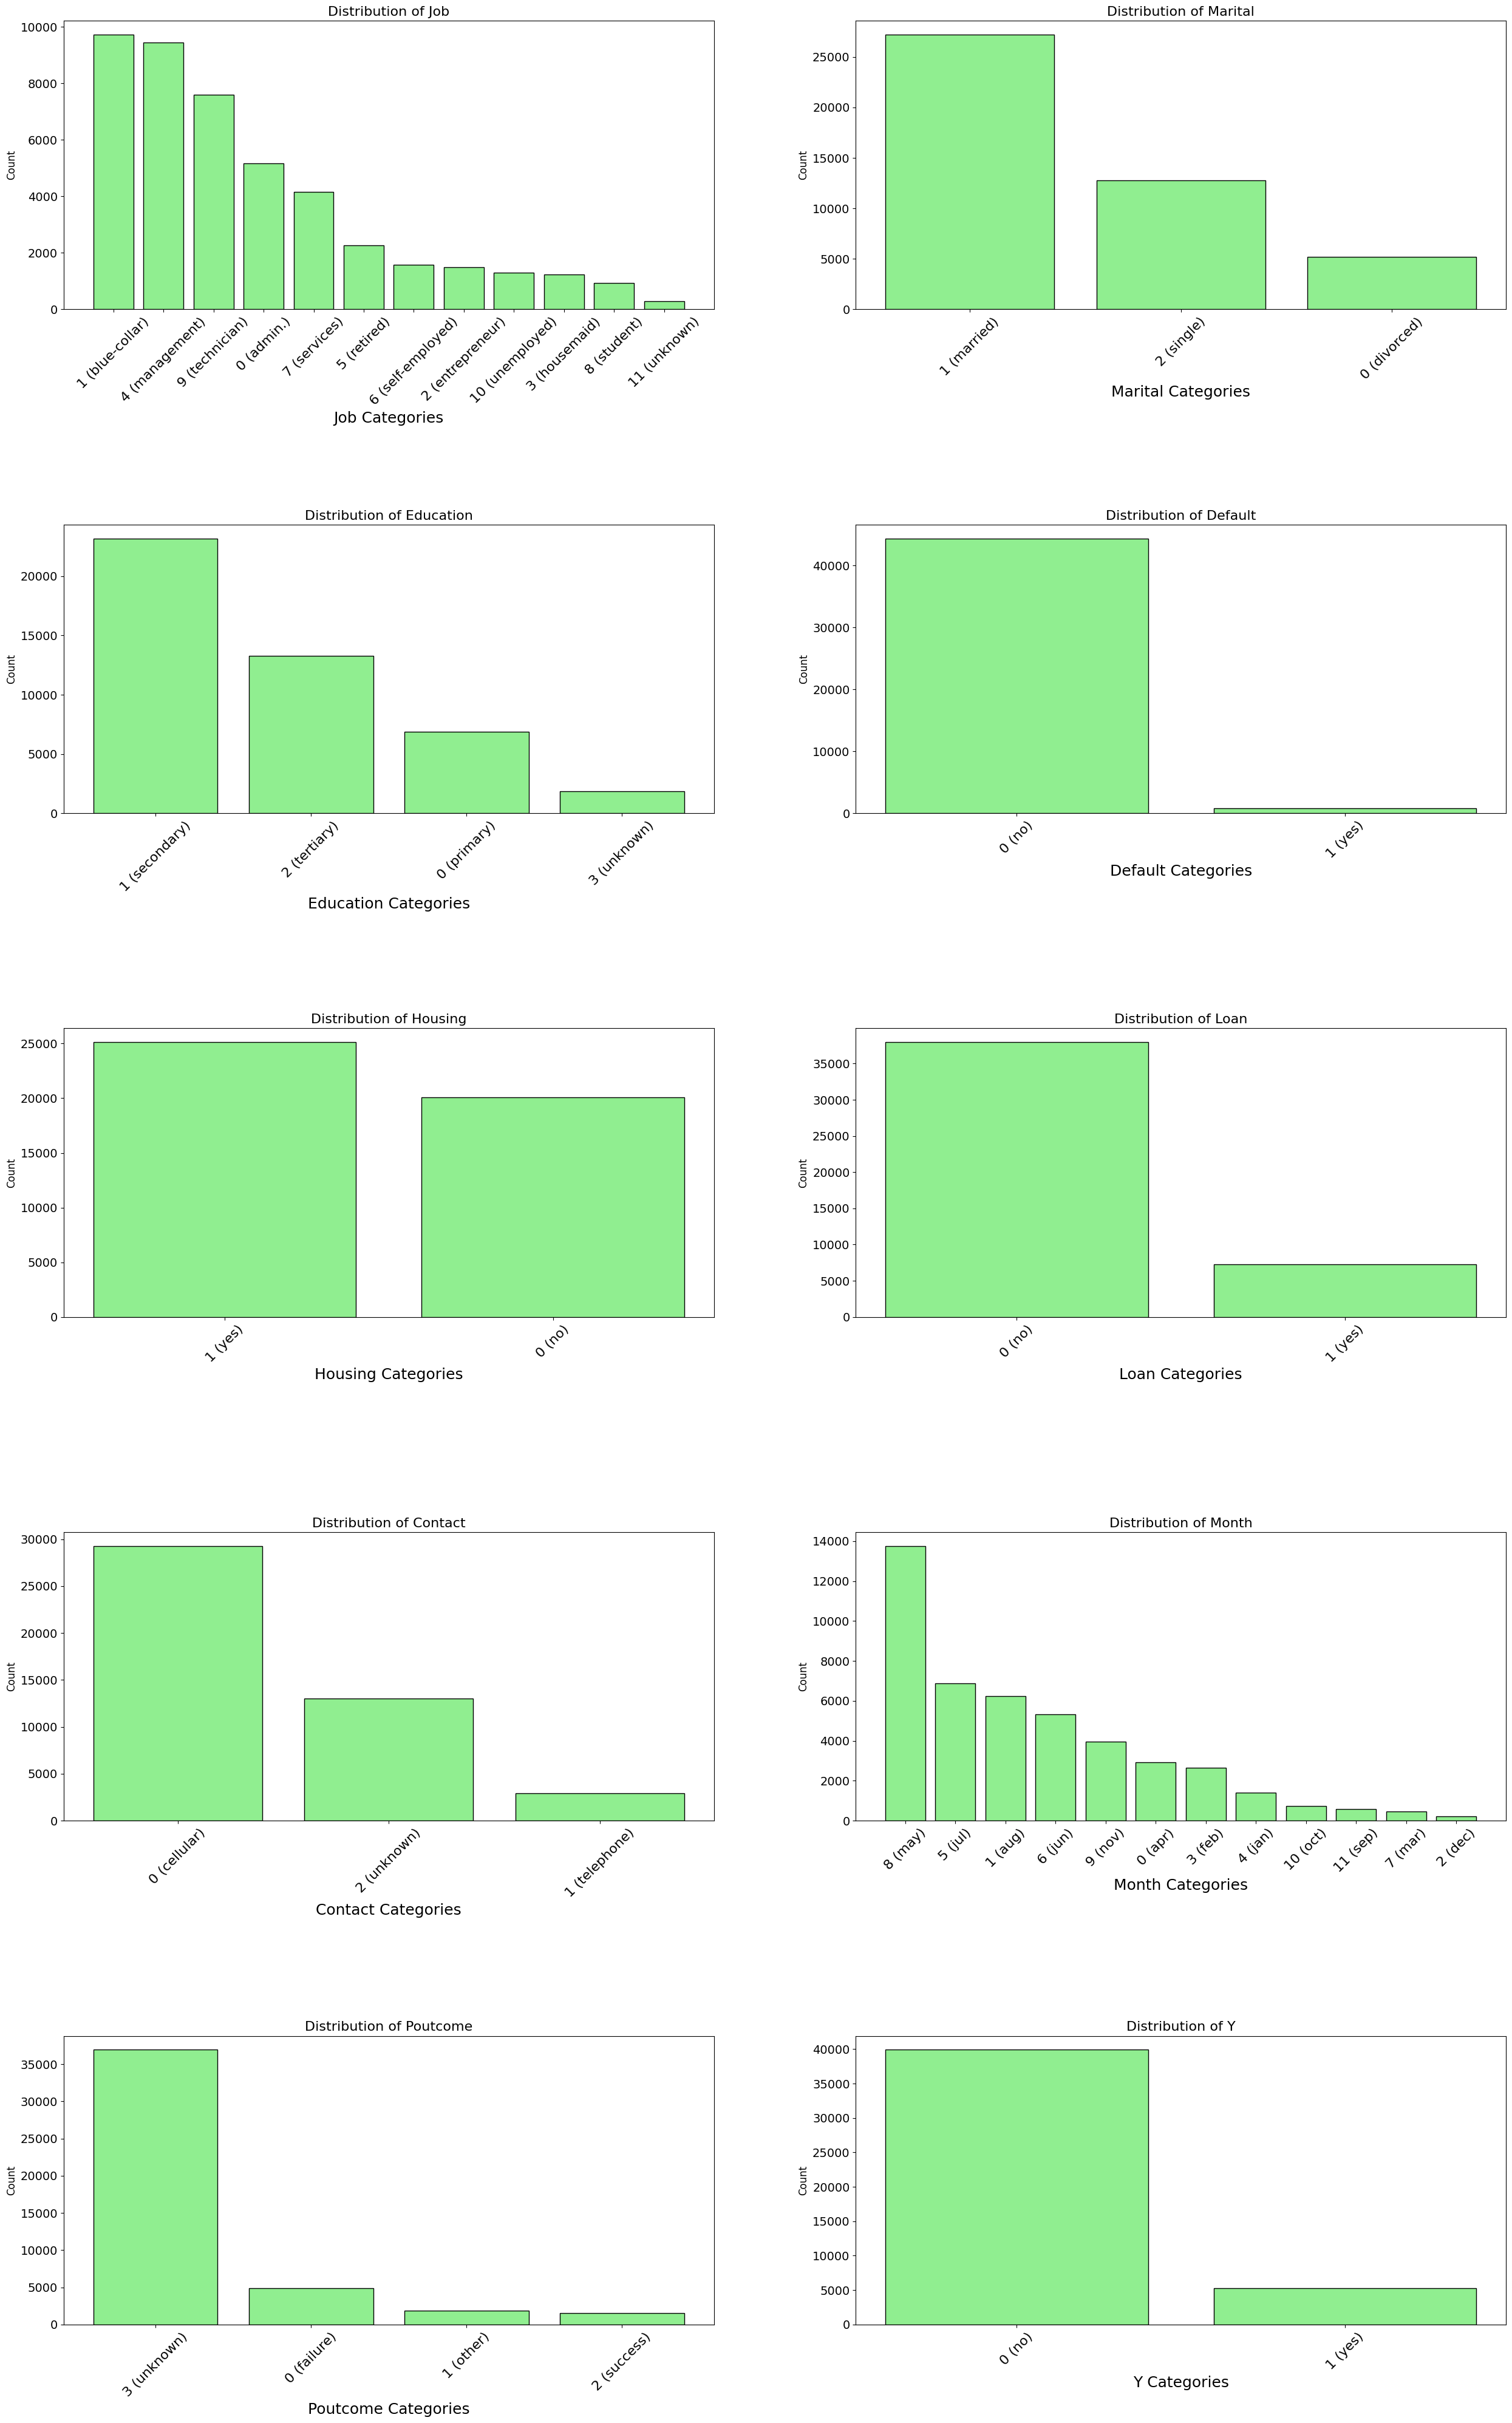

In [10]:

import matplotlib.pyplot as plt
import pandas as pd


# Define the number of rows and columns for the grid
rows, cols = 5, 2
fig, axes = plt.subplots(rows, cols, figsize=(25, 40))
axes = axes.flatten()

# Example mappings (replace with actual mappings if available)
labelMap = {
    'job': {0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'},
    'marital': {0: 'divorced', 1: 'married', 2: 'single'},
    'education': {0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'},
    'default': {0: 'no', 1: 'yes'},
    'housing': {0: 'no', 1: 'yes'},
    'loan': {0: 'no', 1: 'yes'},
    'contact': {0: 'cellular', 1: 'telephone', 2: 'unknown'},
    'month': {0: 'apr', 1: 'aug', 2: 'dec', 3: 'feb', 4: 'jan', 5: 'jul', 6: 'jun', 7: 'mar', 8: 'may', 9: 'nov', 10: 'oct', 11: 'sep'},
    'poutcome': {0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'},
    'y': {0: 'no', 1: 'yes'}
}

# Plot each categorical column
for i, col in enumerate(categoricalColumns):
    counts = splitData[col].value_counts()
    labels = counts.index
    values = counts.values

    # Create labels combining encoded values and original categories
    mapped_labels = [f"{label} ({labelMap[col].get(label, 'unknown')})" for label in labels]

    # Plot on the corresponding subplot
    axes[i].bar(mapped_labels, values, color='lightgreen', edgecolor='black')
    axes[i].set_title(f"Distribution of {col.capitalize()}", fontsize=16)
    axes[i].set_xlabel(f"{col.capitalize()} Categories", fontsize=18)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=16)
    axes[i].tick_params(axis='y', labelsize=14)

# Remove any empty subplots if fewer than 10 charts
for j in range(len(categoricalColumns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.tight_layout(w_pad=10, h_pad=10)
plt.show()



10. Split data to training and testing

In [11]:
from sklearn.model_selection import train_test_split

#Separate features and target variable
X = splitData.drop(columns=['y'])  # Features
y = splitData['y']  # Target variable

#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 36168 samples
Testing set size: 9043 samples


In [12]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# class distribution before SMOTE
print("\nClass distribution before balancing with SMOTE (training set):")
print(y_train.value_counts())

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#class distribution after SMOTE
print("\nTraining set class distribution after balancing with SMOTE:")
print(y_train_resampled.value_counts())


Class distribution before balancing with SMOTE (training set):
y
0    31937
1     4231
Name: count, dtype: int64

Training set class distribution after balancing with SMOTE:
y
0    31937
1    31937
Name: count, dtype: int64
